In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

In [41]:
def map_entries(e):
    k, v = e.split(':')
    return (k, [float(v)])
def me2dict(d):
    return dict(list(map(map_entries, d.split(","))))


In [42]:
# d = [me2dict(d1), me2dict(d2), me2dict(d3)]
# d[0]['algo'] = ['sequential']
# d[1]['algo'] = ['parallel-2']
# d[2]['algo'] = ['parallel-3']


# for k in d[1]:
#     d[0][k] += d[1][k]

# for k in d[2]:
#     d[0][k] += d[2][k]

# m = pd.DataFrame.from_dict(d[0])
# mn = m.drop(columns='algo')
# m

In [43]:

def get_speedup(m, a):
    speedup = m.drop(columns='algo').loc[0] / m.drop(columns='algo').loc[a]
    return speedup

# sm = pd.concat([get_speedup(m, 1), get_speedup(m, 2)], axis=1).transpose()
# sm['algo']
# sm

In [44]:
with open('lab2.txt') as f:
    a = f.read().split()
    data_d = list(map(me2dict, a))
    c = 0
    for d in data_d:
        d['algo'] = [c]
        c+=1
        c%=3
    for i in range(1, len(data_d)):
        for k in data_d[0]:
            data_d[0][k] += data_d[i][k]

df = pd.DataFrame.from_dict(data_d[0])
df.head()

,arr_s,buckets,0_random_generating,1_buckets_ins_filling_(squash),2_buckets_sorting,3_buckets_to_main_array,total_time,algo
0,10000000.0,1000.0,0.129219,0.987505,3.027916,0.167040,4.335940,0
1,10000000.0,1000.0,0.033059,0.458587,0.787683,0.031181,1.310842,1
2,10000000.0,1000.0,0.033653,0.531642,0.933256,0.058224,1.579335,2
3,10000000.0,2000.0,0.138066,1.092889,2.839885,0.166448,4.258515,0
4,10000000.0,2000.0,0.033276,0.537203,0.736848,0.031458,1.339208,1


#### total time vs buckets_no

<AxesSubplot: xlabel='buckets', ylabel='total_time'>

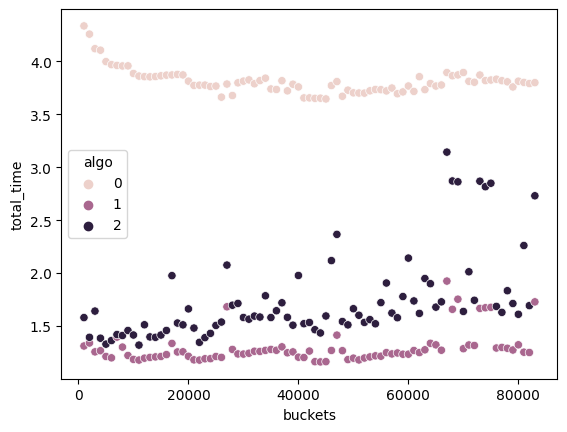

In [45]:
sns.scatterplot(data=df, x='buckets', y='total_time', hue='algo')

In [46]:
def plot(df, i):
    a = df.loc[df['algo'] == i]
    a.drop(columns=['algo', 'buckets', 'arr_s', 'total_time']).plot(kind='bar', stacked=True)
    plt.title(f"time for {i}")

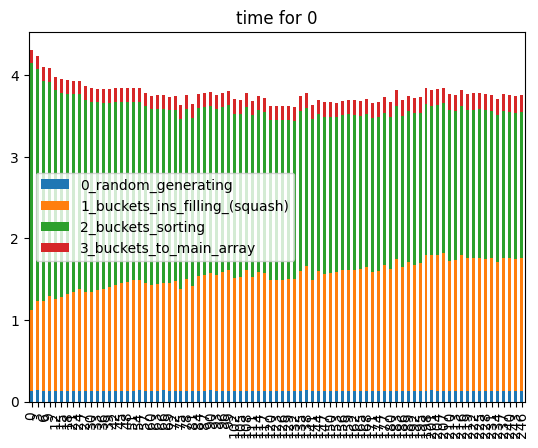

In [47]:
plot(df, 0)

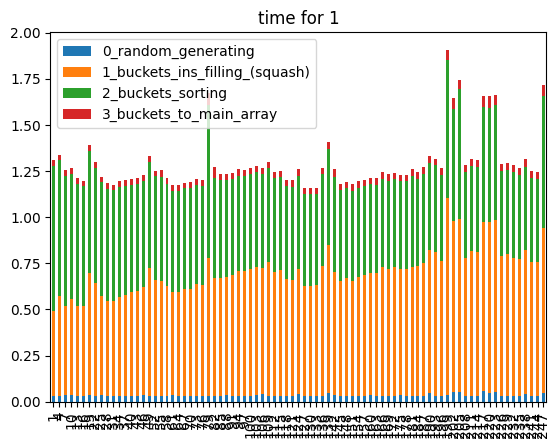

In [48]:
plot(df, 1)

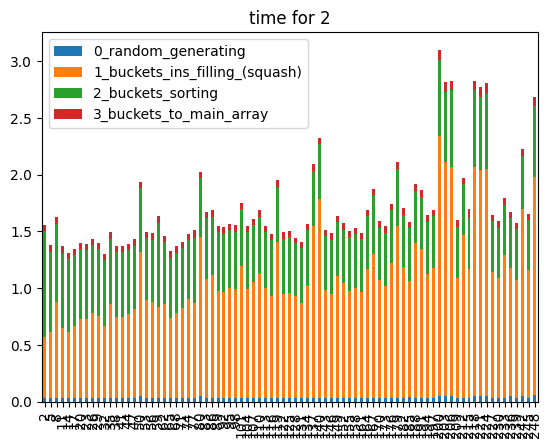

In [49]:
plot(df, 2)

In [50]:
def plot_s(df, i):
    a = df.drop(columns=['buckets', 'arr_s'])
    d1 = a.loc[a['algo'] == i].drop(columns='algo')
    d2 = a.loc[a['algo'] == 0].drop(columns='algo')
    d1, d2 = np.array(d1), np.array(d2)
    a = d1 / d2
    d = pd.DataFrame(data=a, columns=df.columns[2:7])
    d.plot(kind='line', stacked=True)
    plt.title(f"speedup for {i}")

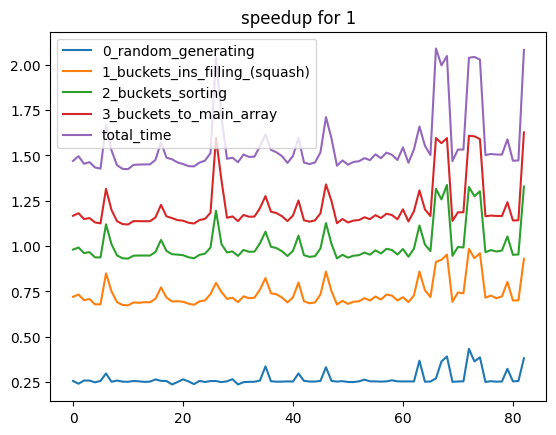

In [51]:
plot_s(df, 1)

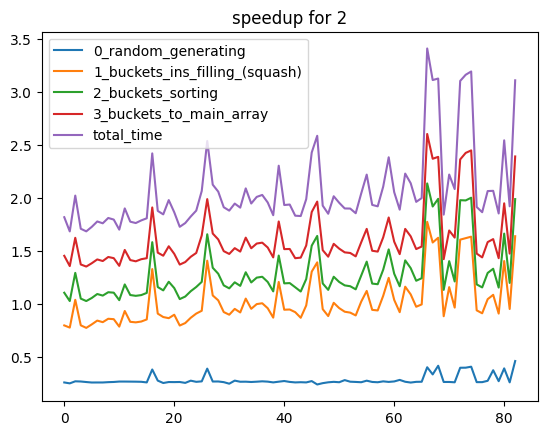

In [52]:
plot_s(df, 2)